<a href="https://colab.research.google.com/github/erenayar-12/DSA210-Project/blob/main/DSA210_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [3]:
from os.path import join

In [4]:
data_path = "/content/gdrive/My Drive"
filename = "final_data.csv"


In [22]:
df = pd.read_csv(join(data_path, filename), delimiter=",")

for col in ['Suicide', 'Theatre', 'Opera', 'Cinema']:
    df[col] = df[col].astype(str).str.replace(" ", "").astype(int) #in the original data, there are spaces between thousands and millions so I erased them with this code in order to calculate correctly

def interpolate_column(df, column_name, method='linear', direction='both'):
    df = df.sort_values('Year')
    df[column_name] = df[column_name].interpolate(method=method, limit_direction=direction)
    return df

df['Population'] = df['Population'].astype(str).str.replace(" ", "").astype(float) #In order to interpolate, we need population to be float type

df['Population'] = df['Population'].replace(0, np.nan) #NULL values typed as 0 at csv file, so I change them as NA of Numpy. NaN from Pandas didn't work
df = interpolate_column(df, 'Population')

#Even though trend is not strictly linear, safest option to fill NA's is linear interpolation

df['Suicide Rate'] = df['Suicide'] / df['Population'] * 100_000

df

,Year,Population,Suicide,Theatre,Opera,Cinema,Suicide Rate
23,2000,6.780393e+07,1802,3746162,258547,17086152,2.657663
22,2001,6.820140e+07,2584,2570120,207360,16905737,3.788778
21,2002,6.859888e+07,2301,2634841,165154,15406597,3.354282
20,2003,6.899635e+07,2705,2758206,273271,14503052,3.920497
19,2004,6.939383e+07,2707,2567491,457717,18670834,3.900923
18,2005,6.979130e+07,2703,2716251,252076,18001466,3.872975
17,2006,7.018878e+07,2829,2161537,245448,23512599,4.030559
16,2007,7.058626e+07,2793,2419262,451271,20659569,3.956861
15,2008,7.151710e+07,2816,3380214,325364,31132231,3.937520
14,2009,7.256131e+07,2898,4320729,181605,31334447,3.993864


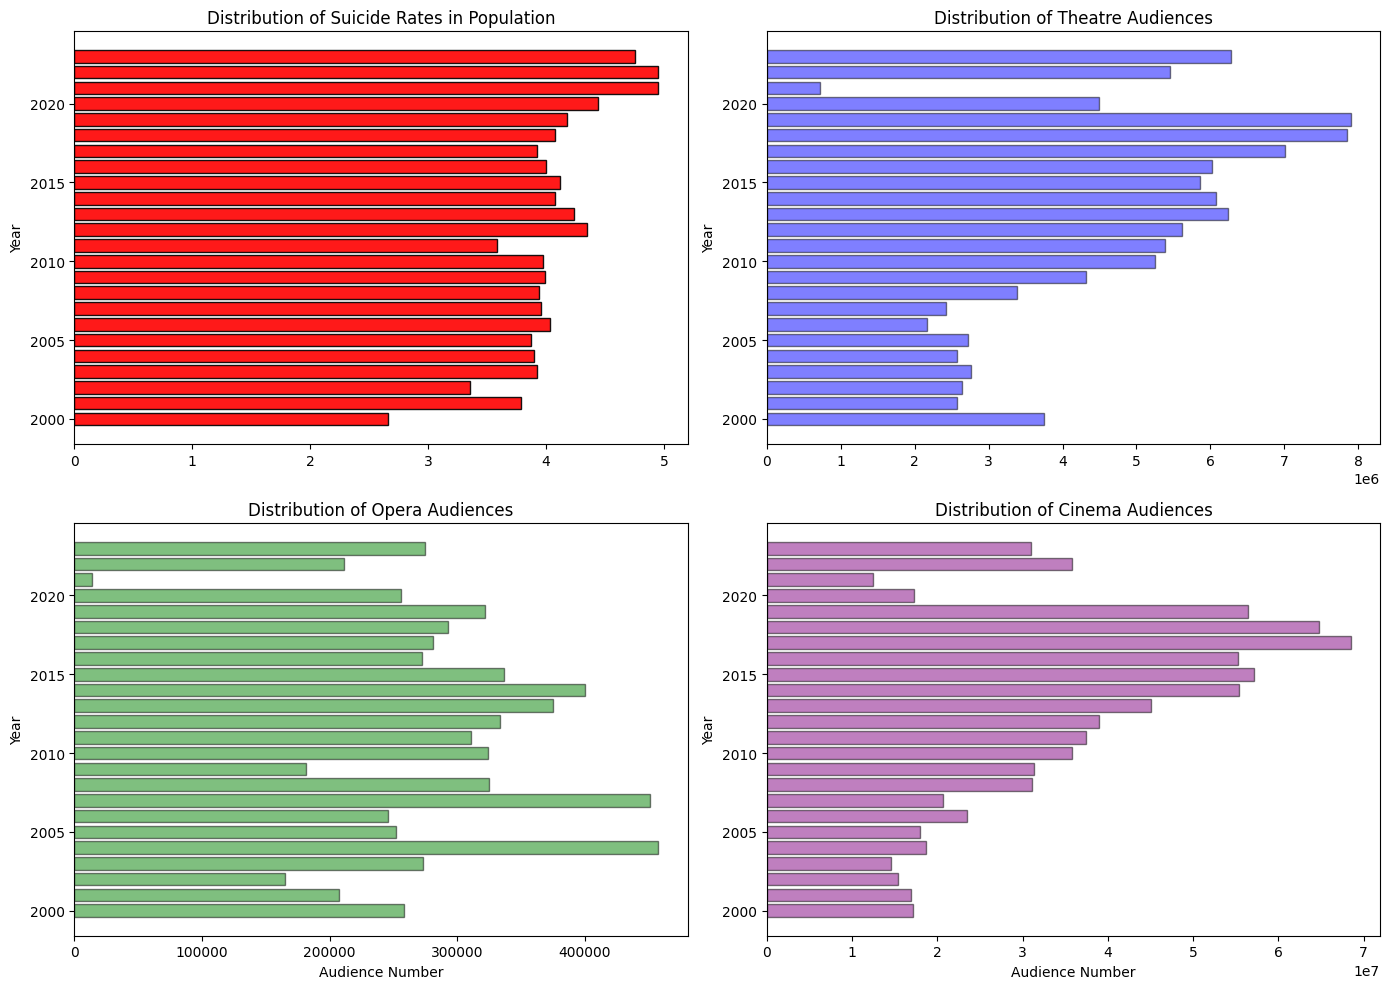

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14,10)) #creating 2x2 area to visualize 4 different data

bins = 10

#Top left
axes[0, 0].barh(df['Year'], df["Suicide Rate"], color="red", alpha=0.9, edgecolor="black") #I've choosen a little darker color to emphasize suicide number is the main actor here
axes[0, 0].set_title("Distribution of Suicide Rates in Population")
axes[0, 0].set_ylabel("Year")

# Top right
axes[0, 1].barh(df['Year'], df["Theatre"], color="blue", alpha=0.5, edgecolor="black")
axes[0, 1].set_title("Distribution of Theatre Audiences")
axes[0, 1].set_ylabel("Year")

# Bottom left
axes[1, 0].barh(df['Year'], df["Opera"], color="green", alpha=0.5, edgecolor="black")
axes[1, 0].set_title("Distribution of Opera Audiences")
axes[1, 0].set_ylabel("Year")
axes[1, 0].set_xlabel("Audience Number")

# Bottom right
axes[1, 1].barh(df['Year'], df["Cinema"], color="purple", alpha=0.5, edgecolor="black")
axes[1, 1].set_title("Distribution of Cinema Audiences")
axes[1, 1].set_ylabel("Year")
axes[1, 1].set_xlabel("Audience Number")

plt.tight_layout()
plt.show()

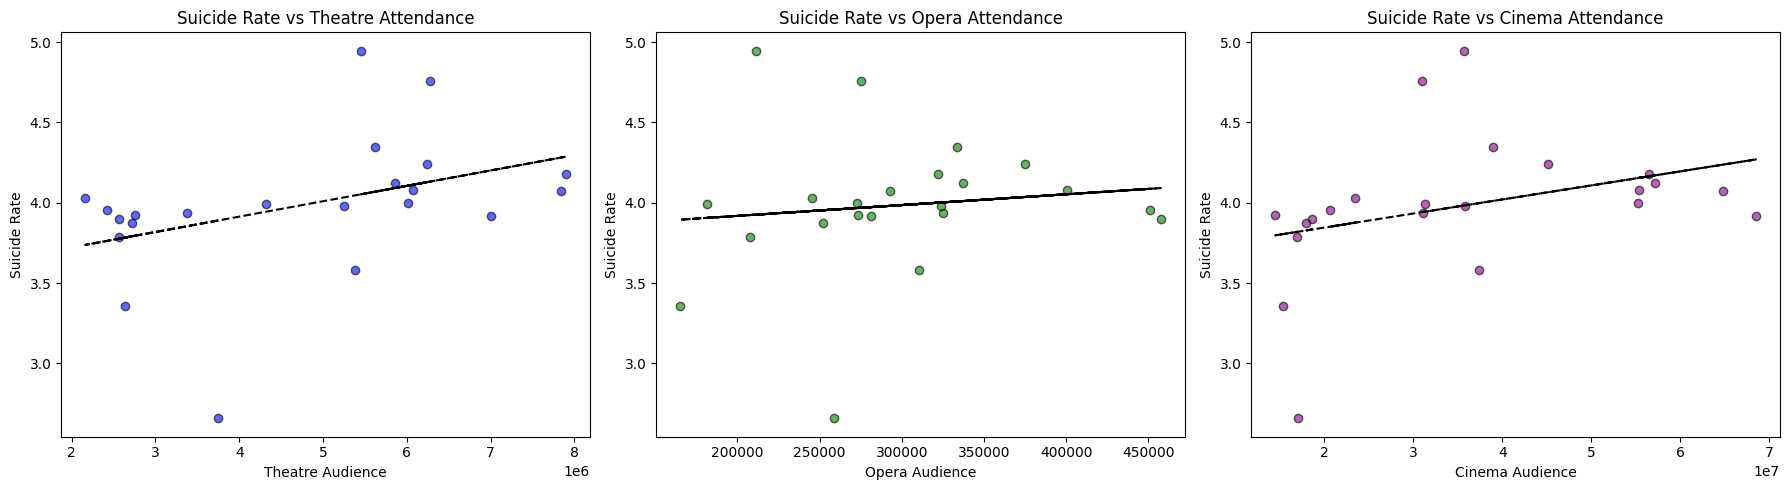

In [28]:
# Filter out COVID years
filtered_df = df[~df['Year'].isin([2020, 2021])]

# Scatter plots with trend lines for filtered data
fig2, axes2 = plt.subplots(1, 3, figsize=(18, 5))

# 1. Suicide Rate vs Theatre
x = filtered_df['Theatre']
y = filtered_df['Suicide Rate']
axes2[0].scatter(x, y, color='blue', alpha=0.6, edgecolor='black')
m, b = np.polyfit(x, y, 1)
axes2[0].plot(x, m*x + b, color='black', linestyle='--')
axes2[0].set_title("Suicide Rate vs Theatre Attendance")
axes2[0].set_xlabel("Theatre Audience")
axes2[0].set_ylabel("Suicide Rate")

# 2. Suicide Rate vs Opera
x = filtered_df['Opera']
y = filtered_df['Suicide Rate']
axes2[1].scatter(x, y, color='green', alpha=0.6, edgecolor='black')
m, b = np.polyfit(x, y, 1)
axes2[1].plot(x, m*x + b, color='black', linestyle='--')
axes2[1].set_title("Suicide Rate vs Opera Attendance")
axes2[1].set_xlabel("Opera Audience")
axes2[1].set_ylabel("Suicide Rate")

# 3. Suicide Rate vs Cinema
x = filtered_df['Cinema']
y = filtered_df['Suicide Rate']
axes2[2].scatter(x, y, color='purple', alpha=0.6, edgecolor='black')
m, b = np.polyfit(x, y, 1)
axes2[2].plot(x, m*x + b, color='black', linestyle='--')
axes2[2].set_title("Suicide Rate vs Cinema Attendance")
axes2[2].set_xlabel("Cinema Audience")
axes2[2].set_ylabel("Suicide Rate")

plt.tight_layout()
plt.show()


HYPOTHESIS TESTING:

Null Hypothesis (H0) : There is no correlation between cultural activities and numbers of suicides.

Alternative Hypothesis (H1): There is a negative correlation between cultural activities and numbers of suicides.

Now we will check those hypothesis via Pearson Coefficients.


In [25]:
#naming the columns again so it will be easier to write Pearson codes
#Also using non_covid_df helps us to understand real relations with neglecting COVID's effects
non_covid_df = df[~df['Year'].isin([2020, 2021])]
theatre = non_covid_df['Theatre']
opera = non_covid_df['Opera']
cinema = non_covid_df['Cinema']
suicide = non_covid_df['Suicide Rate']


# calculating Perason Coefficients
r_theatre, p_value_theatre = stats.pearsonr(suicide, theatre)
r_opera, p_value_opera = stats.pearsonr(suicide, opera)
r_cinema, p_value_cinema = stats.pearsonr(suicide, cinema)

print(f"Pearson Correlation Coefficient (Theatre): {r_theatre:.4f}")
print(f"p-value (Theatre): {p_value_theatre:.4f}")
print(f"Pearson Correlation Coefficient (Opera): {r_opera:.4f}")
print(f"p-value (Opera): {p_value_opera:.4f}")
print(f"Pearson Correlation Coefficient (Cinema): {r_cinema:.4f}")
print(f"p-value (Cinema): {p_value_cinema:.4f}")

Pearson Correlation Coefficient (Theatre): 0.3997
p-value (Theatre): 0.0653
Pearson Correlation Coefficient (Opera): 0.1165
p-value (Opera): 0.6057
Pearson Correlation Coefficient (Cinema): 0.3393
p-value (Cinema): 0.1224


When we look at p-values we see that they all greater than 0.05, so we fail to reject null hypothesis.

By looking at r-values:

For Theatre, Opera and Cinema, there are weak positive correlations.

When we consider all, weak correlations may be due to other factor or by chance.


               Model  R2 Score      RMSE
0  Linear Regression -0.444642  0.682094
1      Decision Tree  0.058540  0.550637
2      Random Forest  0.007881  0.565257

Naive Bayes Classification Metrics:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
F1 Score : 1.00
AUC      : 1.00


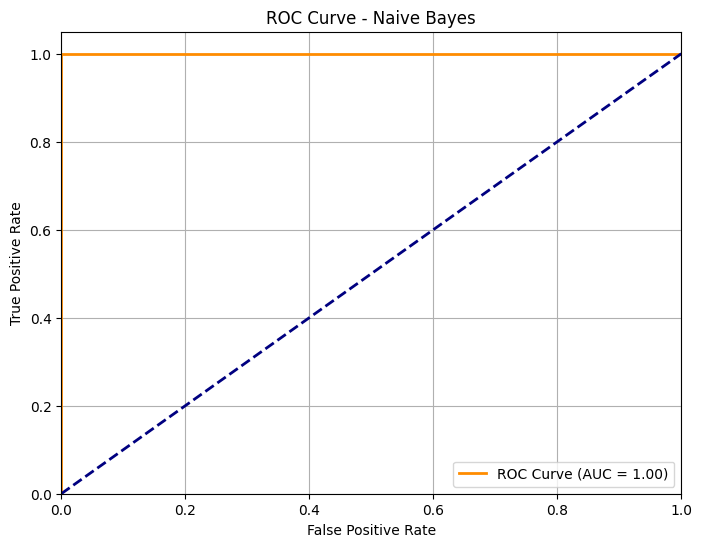

In [30]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_curve, roc_auc_score
)

# Use non-COVID years
X = non_covid_df[['Theatre', 'Opera', 'Cinema']]
y = non_covid_df['Suicide Rate']

# Split into training and testing
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization (only for Linear Regression, optional for tree-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
X_test_scaled = scaler.transform(X_test_reg)

# ---------- LINEAR REGRESSION ----------
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_reg)
y_pred_lr = lr.predict(X_test_scaled)

# ---------- DECISION TREE ----------
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_reg, y_train_reg)
y_pred_dt = dt.predict(X_test_reg)

# ---------- RANDOM FOREST ----------
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_reg, y_train_reg)
y_pred_rf = rf.predict(X_test_reg)

# ---------- RESULTS COMPARISON ----------
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "R2 Score": [
        r2_score(y_test_reg, y_pred_lr),
        r2_score(y_test_reg, y_pred_dt),
        r2_score(y_test_reg, y_pred_rf)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test_reg, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test_reg, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))
    ]
}

results_df = pd.DataFrame(results)
print(results_df)
print("")



# --- Preprocess ---
X = non_covid_df[['Theatre', 'Opera', 'Cinema']]
y = non_covid_df['Suicide Rate']
median_rate = y.median()
y_class = (y > median_rate).astype(int)  # Convert to binary classification

# --- Split ---
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, random_state=42)

# --- Train Naive Bayes ---
nb = GaussianNB()
nb.fit(X_train_cls, y_train_cls)
y_pred = nb.predict(X_test_cls)
y_prob = nb.predict_proba(X_test_cls)[:, 1]

# --- Metrics ---
accuracy = accuracy_score(y_test_cls, y_pred)
precision = precision_score(y_test_cls, y_pred, zero_division=0)
recall = recall_score(y_test_cls, y_pred, zero_division=0)
f1 = f1_score(y_test_cls, y_pred, zero_division=0)
auc = roc_auc_score(y_test_cls, y_prob)


print("Naive Bayes Classification Metrics:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")
print(f"AUC      : {auc:.2f}")

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test_cls, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()




